# Time Series Analysis: U.S. State Government Expenditure (1992–2019)

In [65]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

## Load the Excel File

In [67]:
df = pd.read_excel("../data/state_finance_data.xlsx")
df.head()

,State,Year,Totals.Capital outlay,Totals.Revenue,Totals.Expenditure,Totals.General expenditure,Totals.General revenue,Totals.Insurance trust revenue,Totals.Intergovernmental,Totals.License tax,...,Details.Welfare.Welfare Institution Total Expenditure,Details.Natural Resources.Parks.Parks Total Expenditure,Details.Transportation.Highways.Highways Total Expenditure,Totals. Debt at end of fiscal year,Details.Insurance benefits and repayments,Details.Interest on debt,Details.Interest on general debt,Details.Miscellaneous general revenue,Details.Other taxes,Details.Police protection
0,ALABAMA,1992,664748,10536166,9650515,8788293,8910315,1473217,2737180,395202,...,1853436,9728,694874,4128724,724852,280179,280179,607453,205227,77789
1,ALABAMA,1993,781952,11389335,10242374,9339796,9688246,1570768,2965310,377723,...,2016935,11031,856228,4170084,761582,267648,267648,599988,224878,78320
2,ALABAMA,1994,767100,11599362,10815221,9922352,10014415,1454982,3077084,386771,...,2167799,12053,883852,3853804,762811,250642,250642,643807,234592,86839
3,ALABAMA,1995,808001,12279726,11541881,10489513,10582838,1566923,3240417,480698,...,2291264,10645,924411,3758726,912649,193752,193752,643469,232783,83482
4,ALABAMA,1996,760751,12741148,12126587,10991713,10894396,1710360,3347019,422841,...,2325418,7788,881381,3645292,987710,216842,216842,649073,265426,86936


## Clean & Prepare the Data

In [68]:
df = df[['Year', 'Totals.Expenditure']].dropna()
df['Year'] = df['Year'].astype(int)
yearly_expenditure = df.groupby('Year')['Totals.Expenditure'].sum()
yearly_expenditure.head()

Year
1992    701600905
1993    743244388
1994    779459126
1995    836893670
1996    859599139
Name: Totals.Expenditure, dtype: int64

## Plot the Expenditure Over Time

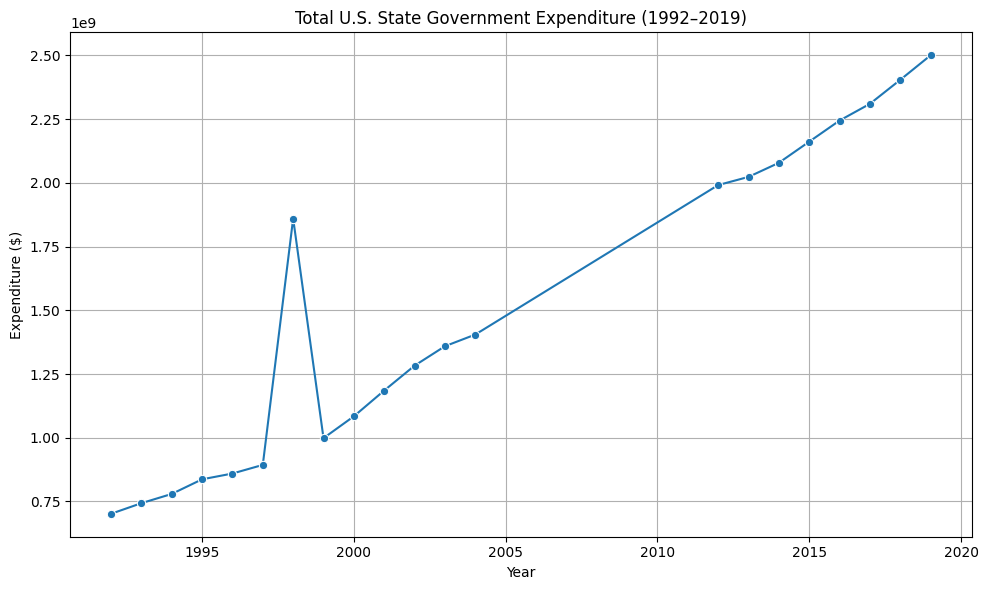

In [69]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_expenditure.index, y=yearly_expenditure.values, marker='o')
plt.title('Total U.S. State Government Expenditure (1992–2019)')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

## Optional: Rolling Average

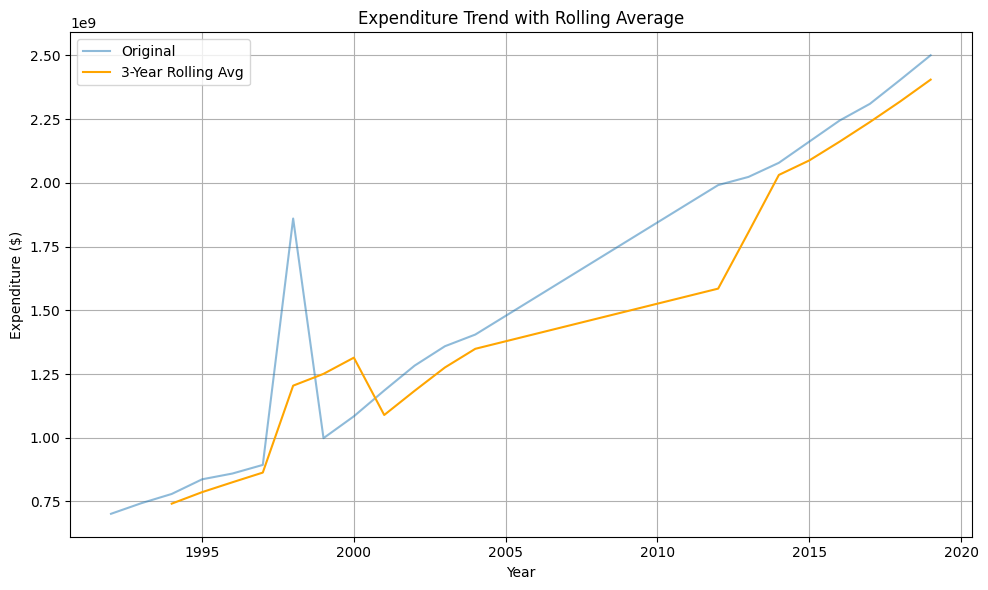

In [70]:
rolling_avg = yearly_expenditure.rolling(window=3).mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_expenditure.index, y=yearly_expenditure.values, label='Original', alpha=0.5)
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label='3-Year Rolling Avg', color='orange')
plt.title('Expenditure Trend with Rolling Average')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Forecast with ARIMA

In [71]:
model = ARIMA(yearly_expenditure, order=(1, 1, 1))
results = model.fit()
forecast = results.forecast(steps=5)
print("Forecast for the next 5 years:")
print(forecast)

# Get the last year from your historical data
last_year = yearly_expenditure.index.max()

# Generate correct year labels for the forecast
forecast_years = list(range(last_year + 1, last_year + 1 + len(forecast)))
forecast.index = forecast_years

Forecast for the next 5 years:
21    2.469711e+09
22    2.476031e+09
23    2.474739e+09
24    2.475003e+09
25    2.474949e+09
Name: predicted_mean, dtype: float64


/Users/anelnaukan/GitHub/python-projects/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anelnaukan/GitHub/python-projects/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/anelnaukan/GitHub/python-projects/time-series-analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(da

## Plot the Forecast

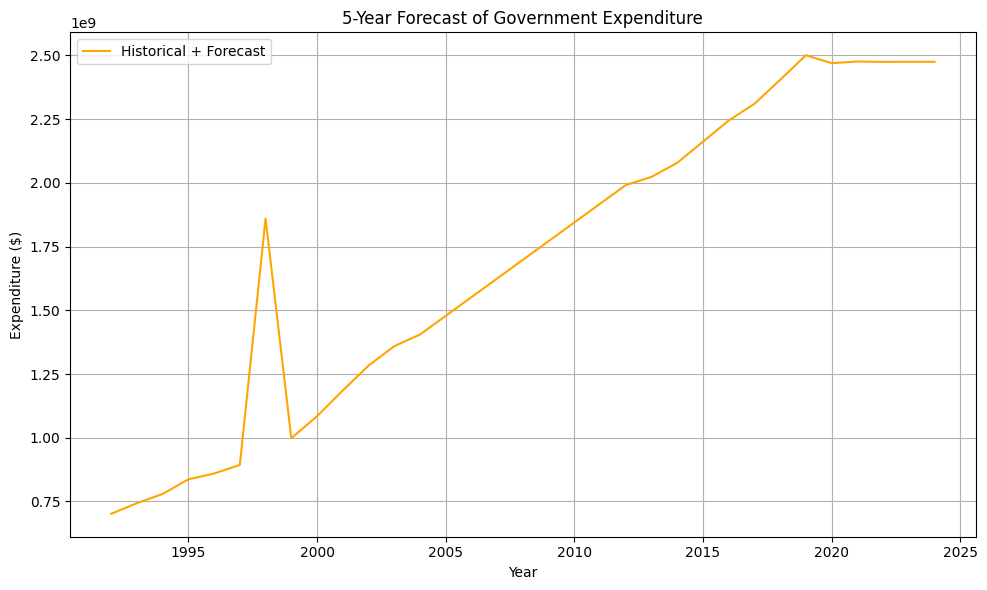

In [72]:
plt.figure(figsize=(10, 6))
combined = pd.concat([yearly_expenditure, forecast])
plt.plot(combined.index, combined.values, label='Historical + Forecast', color='orange')
plt.title('5-Year Forecast of Government Expenditure')
plt.xlabel('Year')
plt.ylabel('Expenditure ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()